Lab 3

- calculez de mana transformata Fourier
- prima data: cu cicluri repetitive explicite.
- a doua oara: matr Fourier si produs matrice - vector.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

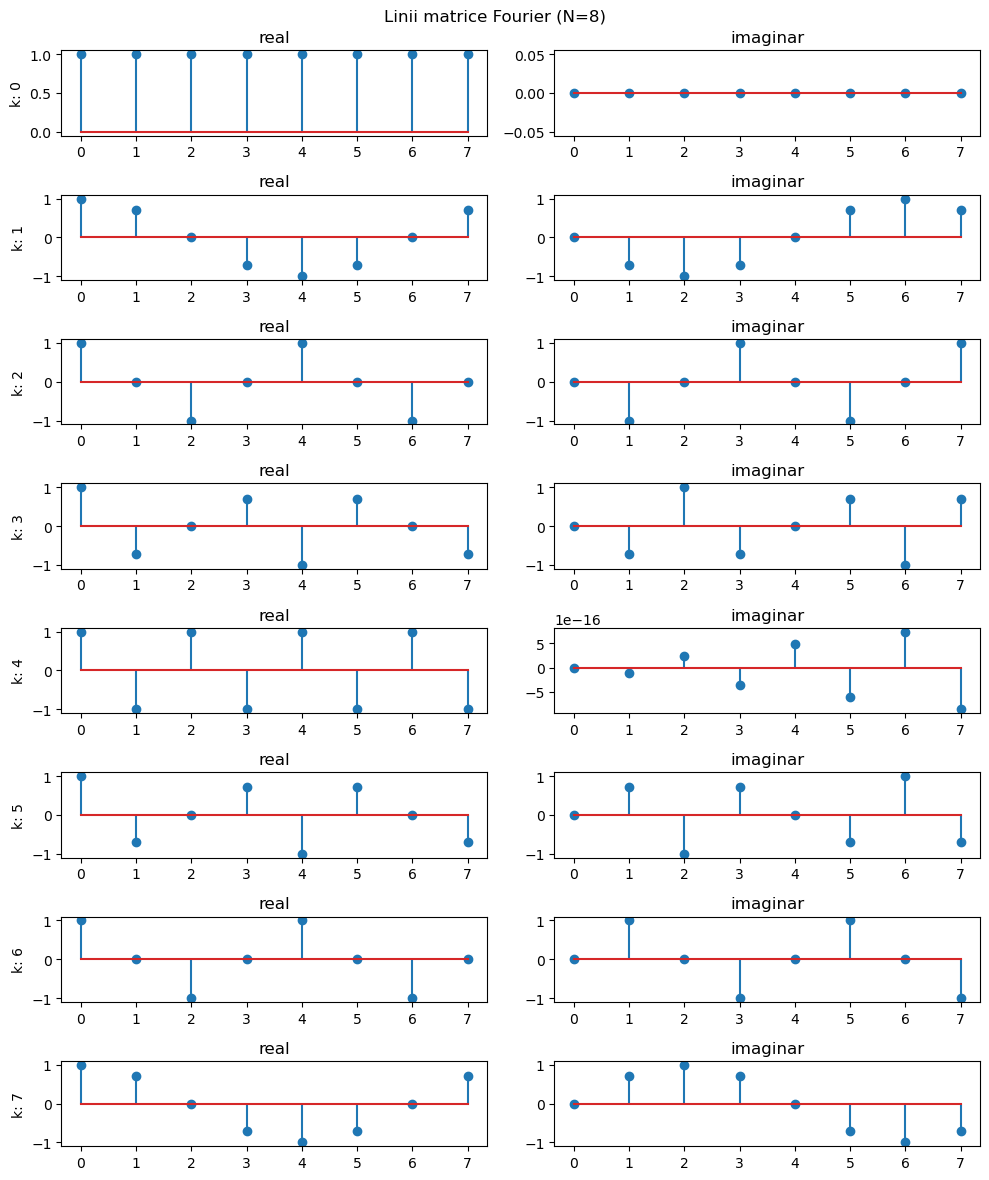

In [16]:
# in TF analizez frecventele:
# f_k = k * fs / N , pt k = 0, N-1

N = 8
matr_fourier = np.zeros((N, N), dtype=complex)
for k in range(N):
    for n in range(N):
        matr_fourier[k, n] = math.e ** (-2j * np.pi * k * n / N)

fig, axes = plt.subplots(N, 2, figsize=(10, 12))
fig.suptitle("Linii matrice Fourier (N=8)")

for k in range(N):
    
    axes[k][0].stem(np.real(matr_fourier[k, :]))
    axes[k][0].set_ylabel(f"k: {k}")
    axes[k][0].set_title("real")
    
    axes[k][1].stem(np.imag(matr_fourier[k, :]))
    axes[k][1].set_title("imaginar")

plt.tight_layout()
plt.savefig("1_Linii_matr_Fourier.pdf")
plt.show()


In [3]:
#np.allclose() #Returns True if two arrays are element-wise equal within a tolerance.
#np.linalg.norm()

#hermitian = transp si complex conjugata

#matr identitate:
I = np.eye(N)
# print(I)

F = matr_fourier
F_H = F.T.conj()

print((F @ F_H).shape)

print(np.allclose( N*I , F @ F_H)) #, atol = 1.0 

#Verific daca matr_fourier e unitara <=> F^H * F = multiplu de I




(8, 8)
True


2. Graficele din Fig. 1 si 2

Pentru un semnal sinusoidal cu frecv aleasa de mine, alta decat cea utilizata.




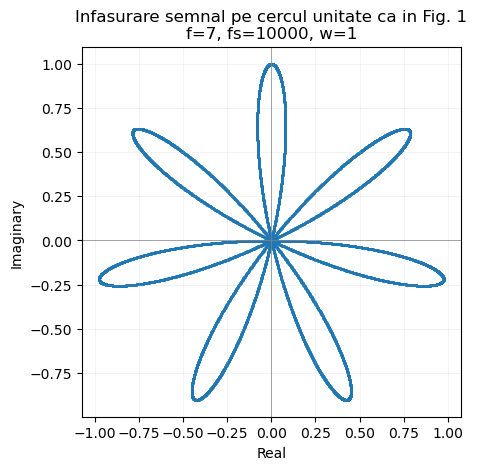

In [17]:
f = 7 #Hz # da numarul de oscilatii ale sinusoidei intr o secunda

# Daca f = impar => nr de petale = f
#      f =   par => nr de petale = 2f

fs = 10000 # da numarul de puncte pe care le iau din plotul functiei sin
ts = 1/fs

def x(t):
    return np.sin(2* np.pi * f * t)


def z(n, omega):
    return x(n) * (math.e ** (-2j * np.pi * omega * n ) )

vector_n = np.arange(0, 1, ts)

omega = 1 # da numarul de infasurari ale cercului unitate
            # = de cate ori se roteste fazorul e^-2pijwt pe cerc in jurul originii
            
z_values = z(vector_n, omega) #z = vectorul de valori ale semnalului infasurate in jurul cercului unitate,
# print(z_values)
z_real = [z.real for z in z_values]
z_imag = [z.imag for z in z_values]


plt.title(f"Infasurare semnal pe cercul unitate ca in Fig. 1\nf={f}, fs={fs}, w={omega}")
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.grid(True, linewidth=0.5, alpha=0.2)
plt.scatter(z_real, z_imag, s=1)
plt.savefig("2_Infasurare_semnal_pe_cercul_unitate.pdf")
plt.show()



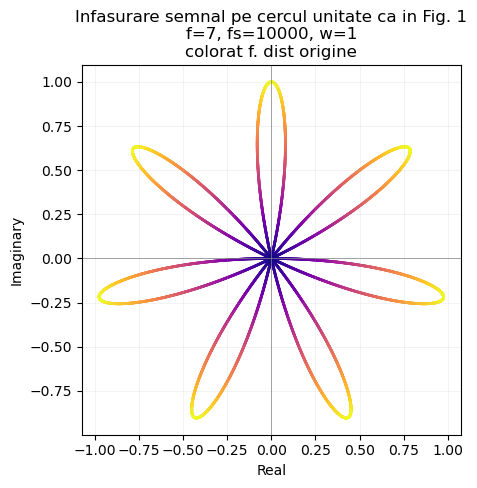

In [19]:
f = 7 #Hz # da numarul de oscilatii ale sinusoidei intr o secunda

# Daca f = impar => nr de petale = f
#      f =   par => nr de petale = 2f

fs = 10000 # da numarul de puncte pe care le iau din plotul functiei sin
ts = 1/fs

def x(t):
    return np.sin(2* np.pi * f * t)


def z(n, omega):
    return x(n) * (math.e ** (-2j * np.pi * omega * n ) )

vector_n = np.arange(0, 1, ts)

omega = 1 # da numarul de infasurari ale cercului unitate
            # = de cate ori se roteste fazorul e^-2pijwt pe cerc in jurul originii
            
z_values = z(vector_n, omega) #z = vectorul de valori ale semnalului infasurate in jurul cercului unitate,
# print(z_values)
z_real = [z.real for z in z_values]
z_imag = [z.imag for z in z_values]


plt.title(f"Infasurare semnal pe cercul unitate ca in Fig. 1\nf={f}, fs={fs}, w={omega}\ncolorat f. dist origine")
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.grid(True, linewidth=0.5, alpha=0.2)
plt.scatter(z_real, z_imag, s=1, 
            c=np.abs(z_values), #distanta fata de origine = modulul fiecarui punct din planul complex care alcatuieste floarea
            cmap='plasma')
plt.savefig("2_Infasurare_semnal_pe_cercul_unitate_colorat_pe_baza_distantei_fd_origine.pdf")
plt.show()






Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


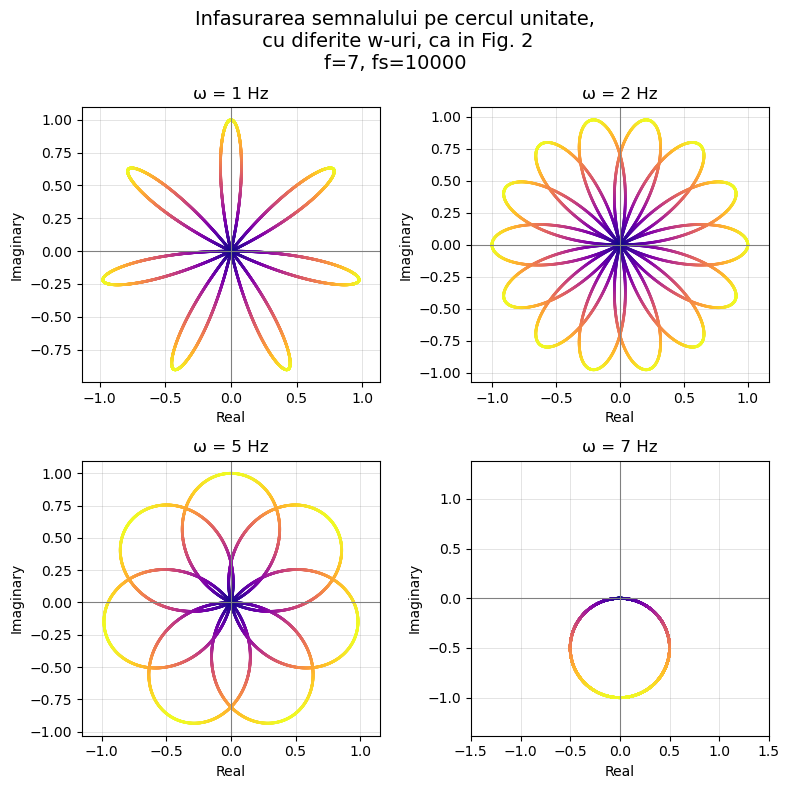

In [20]:

f = 7  #frecventa sinusoidei
fs = 10000
ts = 1/fs
t = np.arange(0, 1, ts) #momentele de timp la care esantionez
x = np.sin(2*np.pi*f*t) #valorile sinusoidei la acele momente

omegas = [1, 2, 5, 7] #frecventele de infasurare pe cercul unitate

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for ax, omega in zip(axes.flat, omegas):
    z = x * (math.e ** (-2j*np.pi*omega*t))
    ax.set_aspect('equal', 'box')
    
    
    
    ax.axhline(0, color='gray', linewidth=0.8)
    ax.axvline(0, color='gray', linewidth=0.8)
    
    ax.scatter(z.real, z.imag, s=1, c=np.abs(z), cmap = "plasma")
    ax.set_title(f"ω = {omega} Hz")
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginary")
    ax.axis('equal')
    if omega == f:
        ax.set_xlim([-1.5, 1.5])  #limitele plotului ca sa fie centrat in 0
        ax.set_ylim([-1.5, 1.5])
    ax.grid(True, color='gray', linewidth=0.5, alpha=0.3)
    ax.set_axisbelow(True)

plt.suptitle(f"Infasurarea semnalului pe cercul unitate,\n cu diferite w-uri, ca in Fig. 2\nf={f}, fs={fs}", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig("2_Infasurare_semnale_pe_cercul_unitate_cu_diferite_omega.pdf")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

f = 5
fs = 1000
ts = 1/fs
t = np.arange(0, 1, ts)
omega = 1

x = np.sin(2 * np.pi * f * t) #vectorul cu esantioanele semnalului

z = x * np.exp(-2j * np.pi * omega * t) #punctele din planul complex = infasurarea semnalului pe cercul unitate

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal', 'box')
ax.set_xlabel("Real")
ax.set_ylabel("Imaginar")
ax.set_title(f"Desenare infasurare w={omega}, f = {f}, fs = {fs}")
ax.grid(True, linestyle=':', alpha=0.2)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)

# Elemente animate
infasurare = ax.plot([], [], color='blue', linewidth=1)[0]
d_punct_curent_origine = ax.plot([], [], color='black', linewidth=2)[0]
punct_curent = ax.plot([], [], 'o', color='black', markersize=5)[0]


def init():
    infasurare.set_data([], [])
    d_punct_curent_origine.set_data([], [])
    punct_curent.set_data([], [])
    return infasurare, d_punct_curent_origine, punct_curent


def update(frame):
    if frame == 0:
        return infasurare, d_punct_curent_origine, punct_curent  # previne frame gol

    infasurare.set_data(np.real(z[:frame]), np.imag(z[:frame])) #infasurarea pana la punctul curent

    d_punct_curent_origine.set_data([0, np.real(z[frame])], [0, np.imag(z[frame])]) #fazorul

    punct_curent.set_data([np.real(z[frame])], [np.imag(z[frame])])
    return infasurare, d_punct_curent_origine, punct_curent

animation = FuncAnimation(
    fig, 
    func = update, # ea imi deseneaza ( = adauga cate un punct) la fiecare frame
    frames=len(z), #nr frame uri = nr de puncte din planul complex (se adauga cate 1 punct in fiecare frame)= lungimea lui z
    init_func=init, 
    interval=1, #cate ms sa am intre frame-uri
    blit=True, #blit = block image transfer = nu redesenez in fiecare frame tot plotul, ci doar ce s a modificat fata de frame ul anterior
    repeat=True
)

writer = PillowWriter(fps=60) #salveaza frame urile desenate de FuncAnimation in GIF

writer = PillowWriter(fps=60)
animation.save("infasurare.gif", writer=writer, dpi=100) #dpi = dots per inch -> defineste rezolutia, 
                                                    #eu am figsize = (w,h) #in inch
                                                    #w_in_pixeli = w * dpi


plt.close(fig)


In [4]:

from matplotlib.animation import FuncAnimation, PillowWriter

f = 7
fs = 1000
ts = 1 / fs
t = np.arange(0, 1, ts)

x = np.sin(2 * np.pi * f * t) #semnalul

omegas = [1, 2, 5, 7] #astea sunt vitezele de infasurare

fig, axes = plt.subplots(2, 2, figsize=(8, 8)) #fig e canvasul pe care apar toate cele 4 figuri si 
                                                # axes e matricea 2 x 2 care contine graficele
# print(axes)
axes = axes.flatten()



infasurari, fazori, puncte, z_all = [], [], [], []


for ax, omega in zip(axes, omegas):
    z = x * np.exp(-2j * np.pi * omega * t)
    z_all.append(z)

    ax.set_title(f"Desenare infasurare cu w={omega}")
    ax.set_aspect('equal', 'box')
    ax.axhline(0, color='gray', linewidth=0.8)
    ax.axvline(0, color='gray', linewidth=0.8)
    ax.set_title(f"ω = {omega} Hz")
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginar")
    ax.grid(True, color='gray', linewidth=0.5, alpha=0.3)
    ax.set_axisbelow(True)

    if omega == f:
        ax.set_xlim([-1.5, 1.5])
        ax.set_ylim([-1.5, 1.5])
    else:
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])

    
    infasurare = ax.plot([], [], color='blue', linewidth=1)[0]
    fazor = ax.plot([], [], color='black', linewidth=2)[0]
    punct = ax.plot([], [], 'o', color='red', markersize=4)[0]

    infasurari.append(infasurare)
    fazori.append(fazor)
    puncte.append(punct)

plt.suptitle(f"Infasurare semnal pe cercul unitate\nf = {f}, fs = {fs}", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 1])


def init():
    for i in range(len(omegas)):
        infasurari[i].set_data([], [])
        fazori[i].set_data([], [])
        puncte[i].set_data([], [])
    return infasurari + fazori + puncte

def update(frame):
    for i in range(len(omegas)):
        z = z_all[i]
        infasurari[i].set_data(np.real(z[:frame]), np.imag(z[:frame]))
        fazori[i].set_data([0, np.real(z[frame])], [0, np.imag(z[frame])])
        puncte[i].set_data([np.real(z[frame])], [np.imag(z[frame])])
    return infasurari + fazori + puncte


animation = FuncAnimation(
    fig,
    func=update,
    frames=len(t),
    init_func=init,
    interval=2,  
    blit=True,
    repeat=False
)

writer = PillowWriter(fps=30)
animation.save("infasurare_4_omegas.gif", writer=writer, dpi=70)

plt.close(fig)


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0]


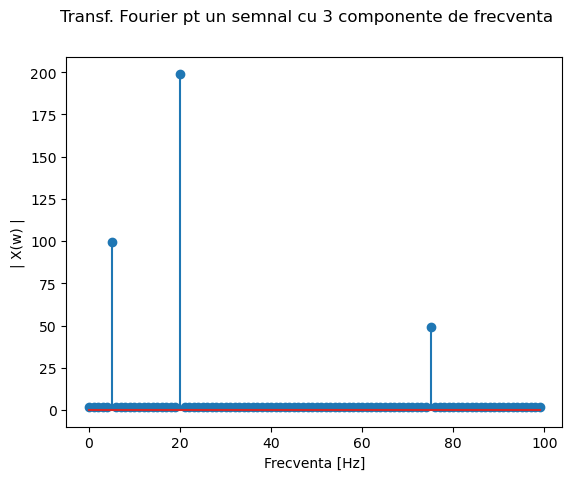

In [21]:
f1 = 5
f2 = 20
f3 = 75

def x(t):
    return np.sin(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t) + 0.5 * np.sin(2 * np.pi * f3 * t)

fs = 200
ts = 1/fs

t = np.arange(0, 1, ts) #momentele de timp intre 0 si 1 la care esantionez



N = len(t) # = nr de esantioane (la mine, nr esantioane = nr de esantioane / s, pt ca esantionez de a lungul unei sg secunde)

def F(k):
    suma = 0 + 0j
    for n in range(N-1):
        suma += x(t[n]) * (math.e ** (-2j * np.pi * k * n / N))
                    # k = indexul componentei de frecventa
                    # N = nr total esantioane
                    # x(t[n]) = esantionul al n-lea, care s-a inregistrat la momentul de timp t[n]
                    # X[k] = cat de multa frecventa corespunzatoare lui k exista in semnalul meu
                    
                    # fiecare componenta X[k] imi spune cat de multa frecventa f_k     =     k/N     *    fs     am in semnal
    return suma


frecvente_analizate = [k * fs /N for k in range(N//2)]
print(frecvente_analizate)

modul_componente_fourier = [np.abs(F(k)) for k in range(N//2)]

plt.figure()
# plt.plot(axa_reala, a(axa_reala))
plt.stem(frecvente_analizate, modul_componente_fourier)
plt.xlabel('Frecventa [Hz]')
plt.ylabel('| X(w) |')
plt.suptitle("Transf. Fourier pt un semnal cu 3 componente de frecventa")
plt.savefig("3_Transf_Fourier_pt_un_semnal_cu_3_componente_de_frecventa.pdf")
plt.show()